<a href="https://colab.research.google.com/github/renatodiascosta/renatodiascosta/blob/main/Equipment_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__TECHNICAL TEST FOR A JUNIOR DATA SCIENTIST APPLICATION AT SHAPE__

__APPLICANT: RENATO DIAS COSTA__

#Introduction

In this technical test, our assignment is to predict equipment failure in an FPSO based on the equipment's setup configuration and on physical parameters measured by sensors (temperature, pressure, vibration and frequency).

- The set configuration is represented by two variables, namely ```Preset_1``` and ```Preset_2```.
- These two variables will be called **_setup variables_**.
- The sensor parameters are registered in six variables, namely ```Temperature```, ```Pressure```, ```VibrationX```, ```VibrationY```, ```VibrationZ``` and ```Frequency```.
- These six variables will be called **_root cause variables_**.

We need to answer 5 questions:
* __Question 1:__ Calculate how many times the equipment has failed.

* __Question 2:__ Categorize equipment failures by setup configurations (```Preset_1``` and ```Preset_2```).

* __Question 3:__ Categorize equipment failures by their nature/root cause according to parameter readings (```Temperature```, ```Pressure``` etc.).

* __Question 4:__ Create a model using the technique you think is most appropriate and measure its performance.

* __Question 5:__ Analyze variable importance.


Before addressing the questions, we start by making the necessary **library imports**, **loading the data** and **exploring the data**.

After answering the questions, we write a **final analysis** to summarize what we have observed and concluded, and close the assignment with some final remarks.

#Library imports

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Loading Data

We load the .xlsx file provided by the recruiter:

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Technical test Shape/O_G_Equipment_Data.xlsx')

In [ ]:
df

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency,Fail
0,1,3,6,44.235186,47.657254,46.441769,64.820327,66.454520,44.483250,False
1,2,2,4,60.807234,63.172076,62.005951,80.714431,81.246405,60.228715,False
2,3,2,1,79.027536,83.032190,82.642110,98.254386,98.785196,80.993479,False
3,4,2,3,79.716242,100.508634,122.362321,121.363429,118.652538,80.315567,False
4,5,2,5,39.989054,51.764833,42.514302,61.037910,50.716469,64.245166,False
...,...,...,...,...,...,...,...,...,...,...
795,796,2,6,50.469522,98.235421,151.585252,99.341380,148.838481,49.841400,True
796,797,1,4,49.985270,160.433640,110.953010,160.777175,109.917566,110.919290,True
797,798,1,4,79.777294,110.535405,61.334995,149.577811,129.463843,70.853353,True
798,799,2,8,79.360314,159.985443,61.762879,169.773831,130.213426,80.113540,True


#Data Exploration

##Basic information on the dataset

We begin by counting rows and columns and getting basic statistical information on numerical variables (range, mean, standard deviation etc.)

In [ ]:
df.shape # Number of rows and columns, respectively.

(800, 10)

In [ ]:
df.describe() # Statistical data on numerical variables in the dataframe.

,Cycle,Preset_1,Preset_2,Temperature,Pressure,VibrationX,VibrationY,VibrationZ,Frequency
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1.988750,4.551250,69.263494,78.997945,73.860275,72.786878,71.866211,68.223449
std,231.0844,0.805875,2.293239,25.536252,32.501834,31.229631,32.739745,27.844616,29.138702
min,1.0000,1.000000,1.000000,2.089354,3.480279,3.846343,10.057744,18.784169,4.380101
25%,200.7500,1.000000,3.000000,51.040134,55.508564,50.752461,48.523982,50.787638,45.861762
50%,400.5000,2.000000,5.000000,65.906716,75.014848,69.394953,65.504770,69.319237,65.664252
75%,600.2500,3.000000,7.000000,80.527220,99.302530,90.195059,94.075572,88.891205,90.097457
max,800.0000,3.000000,8.000000,255.607829,189.995681,230.861142,193.569947,230.951134,178.090303


__Remark:__ ```Temperature``` and ```Frequency``` have a small standard deviations compared to its respective means. In other words, both have relatively little variation in this dataset.

##Histograms for preset variables and failure occurence

- We count how many times specific values occur for each of the variables ```Preset_1``` (ranging from 1 to 3), ```Preset_2``` (ranging from 1 to 8) and ```Fail``` (true or false). 

- We plot histograms to help visualize this counting.

<AxesSubplot:xlabel='Preset_1', ylabel='count'>

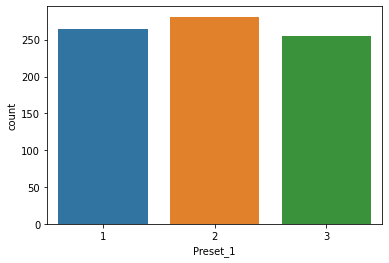

In [ ]:
sns.countplot(x = df['Preset_1']) # Histogram for Preset_1

<AxesSubplot:xlabel='Preset_2', ylabel='count'>

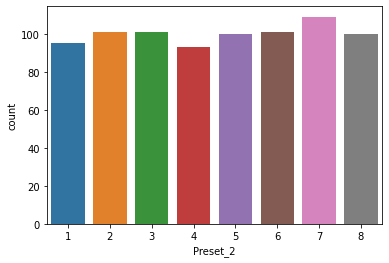

In [ ]:
sns.countplot(x = df['Preset_2']) # Histogram for Preset_2

__Remark:__ ```Preset_1``` and ```Preset_2``` are proportionally distributed; we may say that the dataset is balanced with respect to these two variables.

<AxesSubplot:xlabel='Fail', ylabel='count'>

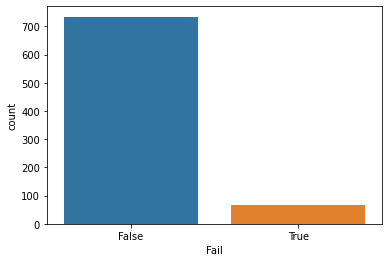

In [ ]:
sns.countplot(x = df['Fail']) # Histogram for Fail

__Remark:__ The number of failures is considerably smaller than that of sucesses (more details in the answer to Question 1).

##Distribution of failures through the cycles

We also investigate how failures behave along the cycles:

In [ ]:
grafico=px.scatter(df, x='Cycle', y='Fail') # Failures in function of cycles
grafico.show()

__Remark:__ Failures _tend_ to occur in isolated sequences of consecutive cycles.

##Effect of isolated root cause variables on failure

We explore how failure behaves in function of each root cause variable (```Temperature```, ```Pressure```, ```VibrationX```, ```VibrationY```, ```VibrationZ```, ```Frequency```). We make a remark for each scatter graph.

In [ ]:
graph = px.scatter_matrix(df, dimensions=['Temperature', 'Fail'])
graph.show()

__Remark:__ When failure occurs, ```Temperature``` falls into some interval around $100$.

In [ ]:
graph = px.scatter_matrix(df, dimensions=['Pressure', 'Fail'])
graph.show()

__Remark:__ When failure occurs, ```Pressure``` falls into some interval around $100$ or around $150$.

In [ ]:
graph = px.scatter_matrix(df, dimensions=['VibrationX', 'Fail'])
graph.show()

__Remark:__ When failure occurs, ```VibrationX``` falls into some interval around $100$.

In [ ]:
graph = px.scatter_matrix(df, dimensions=['VibrationY', 'Fail'])
graph.show()

__Remark:__ When failure occurs, ```VibrationY``` falls into some interval around $125$ (roughly).

In [ ]:
graph = px.scatter_matrix(df, dimensions=['VibrationZ', 'Fail'])
graph.show()

__Remark:__ When failure occurs, ```VibrationZ``` falls into some interval around $105$ (roughly).

In [ ]:
graph = px.scatter_matrix(df, dimensions=['Frequency', 'Fail'])
graph.show()

__Remark:__ When failure occurs, ```Frequency``` falls into some interval around $100$.

__Conclusion:__ In general, when failure occurs, every root cause variable stays roughly around some specific value.

##Joint effect of root cause variables on failure.

- We analyze how root cause variables, together, affect equipment failure.
- The following graphs represent one root cause variable in function of another, and a read dot represents equipment failure.
- We do not try every combinations of variables, but only a few to get a sense of the effect.

In [ ]:
graph_T_P = px.scatter(df, x='Temperature', y='Frequency', color = 'Fail', title='Joint effect of Temperature and Frequency') 
graph_T_P.show()

In [ ]:
graph_T_Vx = px.scatter(df, x='Temperature', y='VibrationX', color = 'Fail', title='Joint effect of Temperature and VibrationX') 
graph_T_Vx.show()

In [ ]:
graph_Vy_Vz = px.scatter(df, x='VibrationY', y='VibrationZ', color = 'Fail', title='Joint effect of VibrationY and VibrationZ')
graph_Vy_Vz.show()

__Remark:__ The red dots tend to form a cluster, which confirms our observation that isolated root cause variable tends to stay in a certain interval when failure occurs. 

##Joint effect of setup variables

Since in Question 2 we contemplate ```Preset_1``` and ```Preset_2``` as predictors, it is interesting to observe their joint effect.

In [ ]:
grafico=px.scatter(df, x='Preset_1', y='Preset_2', color = 'Fail', title='Joint effect of Preset_1 and Preset_2')
grafico.show()

**Remark:** The dot with coordinates (3,4) is the only one in blue. Hence every time we have (3,4) the equipment does not fail.

We count how many times each pair (Preset_1, Preset_2) occurs in order to check whether (3,4) is specially rare or frequent.

In [ ]:
count_pairs = []

for p_1 in range(1, 3+1): # Range of Preset_1
  for p_2 in range(1, 8+1): # Range of Preset_2
    counter = 0 
    for k in range(0, 800): # Going through the 800 rows of the dataframe df
      if df['Preset_1'][k]==p_1 and df['Preset_2'][k]==p_2:
        counter += 1
    count_pairs.append([(p_1, p_2), counter]) # Store how may times the pair (p_1, p_2) appers in the data frame df
count_pairs

[[(1, 1), 34],
 [(1, 2), 38],
 [(1, 3), 43],
 [(1, 4), 22],
 [(1, 5), 31],
 [(1, 6), 34],
 [(1, 7), 38],
 [(1, 8), 24],
 [(2, 1), 30],
 [(2, 2), 34],
 [(2, 3), 26],
 [(2, 4), 40],
 [(2, 5), 40],
 [(2, 6), 37],
 [(2, 7), 37],
 [(2, 8), 37],
 [(3, 1), 31],
 [(3, 2), 29],
 [(3, 3), 32],
 [(3, 4), 31],
 [(3, 5), 29],
 [(3, 6), 30],
 [(3, 7), 34],
 [(3, 8), 39]]

__Remarks:__ 
- The occurence of pairs is relatively well distributed.
- Hence the pair $(3,4)$ basically occurs just as frequently as any other.
- Since the pair $(3,4)$ is the only one where failure does not occur, it is possible that this preset configuration is special in preventing failures.

#Question 1

We count the number of successes and failures and make some remarks about the value obtained.

In [ ]:
np.unique(df['Fail'], return_counts=True) #Number of failures and successes

(array([False,  True]), array([734,  66]))

<AxesSubplot:xlabel='Fail', ylabel='count'>

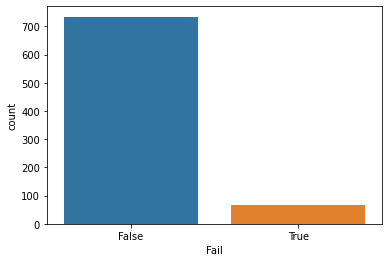

In [ ]:
sns.countplot(x = df['Fail']) # Number of successes (first bar) compared to number of failures (second bar)

In [ ]:
66/800 #Falure rate

0.0825

__Remarks:__
- The equipment fails $66$ out of $800$ times, which corresponds to an $8.25\%$ failure rate.
- We conclude that failures are considerably rare.
- In this case, the trivial prediction model would be to always predict a success, in which case there is a $100-8.25=91.75\%$ accuracy.
- Therefore any model we create should have accuracy greater than $91.75\%$, otherwise it is no better than the trivial one.

#Question 2

We build a model to categorize equipment failure by setup configurations (```Preset_1```, ```Preset_2```).

We proceed in the following order:
1. Setting attributes and class
2. Encoding data
3. Scaling values
4. Splitting data
5. Testing models
6. Conclusion


## 1. Setting attributes and class

In [ ]:
df.columns

Index(['Cycle', 'Preset_1', 'Preset_2', 'Temperature', 'Pressure',
       'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency', 'Fail'],
      dtype='object')

In [ ]:
X_setup = df.iloc[:, 1:3].values #Setting Preset_1 and Preset_2 as attributes
X_setup

array([[3, 6],
       [2, 4],
       [2, 1],
       ...,
       [1, 4],
       [2, 8],
       [3, 1]])

In [ ]:
Y_setup = df.iloc[:, 9].values # Setting Fail as class
Y_setup

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

##2. Encoding data

For ```Fail```, we convert the booleans in the numpy array ```Y_setup``` into integers. 

In [ ]:
Y_setup = Y_setup.astype(int) #Converting Fail from boolean into integers
Y_setup

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##3. Scaling values

We scale the attributes by using a standard scaler:

In [ ]:
scaler_setup = StandardScaler()
X_setup = scaler_setup.fit_transform(X_setup)

In [ ]:
X_setup

array([[ 1.25563154,  0.63214346],
       [ 0.01396871, -0.24053086],
       [ 0.01396871, -1.54954234],
       ...,
       [-1.22769413, -0.24053086],
       [ 0.01396871,  1.50481778],
       [ 1.25563154, -1.54954234]])

##4. Splitting data

We splitt the data set into training set and test set:

In [ ]:
X_setup_training, X_setup_test, Y_setup_training, Y_setup_test = train_test_split(X_setup, 
                                                                                  Y_setup, 
                                                                                  test_size = 0.25,
                                                                                  random_state=0)

In [ ]:
X_setup_training.shape, Y_setup_training.shape

((600, 2), (600,))

In [ ]:
X_setup_test.shape, Y_setup_test.shape

((200, 2), (200,))

##5. Testing models

- We try to apply some classical models to attack this classification problem, namely Naive Bayes, Decision Tree, KNN, Logistic Regression and SVM.

###5.1 Naive Bayes

In [ ]:
naive_Bayes_setup = GaussianNB() # Creating a Naive Bayes classifier
naive_Bayes_setup.fit(X_setup_training, Y_setup_training) # Training the classifier

GaussianNB()

In [ ]:
predictions_naive_Bayes_setup = naive_Bayes_setup.predict(X_setup_test) # Predictions for the test set
predictions_naive_Bayes_setup

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_setup_test, predictions_naive_Bayes_setup) # Accuracy score when comparing predictions to the test set 

0.905

###5.2 Decision Tree

In [ ]:
decision_tree_setup = DecisionTreeClassifier(criterion='entropy',
                                             random_state=0) # Creating a decision tree classifier

In [ ]:
decision_tree_setup.fit(X_setup_training, Y_setup_training) # Training the classifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictions_decision_tree_setup = decision_tree_setup.predict(X_setup_test) # Predictions for the test set

In [ ]:
predictions_decision_tree_setup

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_setup_test, predictions_decision_tree_setup) # Accuracy score when comparing predictions to the test set 

0.905

###5.3 KNN

In [ ]:
knn_setup = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # Creating a KNN classifier

In [ ]:
knn_setup.fit(X_setup_training, Y_setup_training) # Training the classifier

KNeighborsClassifier()

In [ ]:
predictions_knn_setup = knn_setup.predict(X_setup_test) # Predictions for the test set
predictions_knn_setup

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_setup_test, predictions_knn_setup) # Accuracy score when comparing predictions to the test set 

0.905

###5.4 Logistic regression

In [ ]:
logistic_regression_setup = LogisticRegression(random_state=1, C=8) # Creating a logistic regression classifier
logistic_regression_setup.fit(X_setup_training, Y_setup_training) # Training the classifier

LogisticRegression(C=8, random_state=1)

In [ ]:
predictions_regression_setup = logistic_regression_setup.predict(X_setup_test) # Preictions for the test set
predictions_regression_setup

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_setup_test, predictions_regression_setup) # Accuracy score when comparing predictions to the test set 

0.905

###5.5 SVM

In [ ]:
svm_setup = SVC(kernel='rbf', random_state=1, C=8) # Creating an SVM classifier
svm_setup.fit(X_setup_training, Y_setup_training) # Training the classifier

SVC(C=8, random_state=1)

In [ ]:
predictions_svm_setup = svm_setup.predict(X_setup_test) # Predictions for the test set
predictions_svm_setup

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_setup_test, predictions_svm_setup) # Accuracy score when comparing predictions to the test set 

0.905

##6. Conclusion

- All five models tested (Naive Bayes, decision trees, KNN, logistic regression, SVM) revealed the same accuracy score, namely $90.5\%$.
- As noted in the answer to Question 1, the trivial model (i.e., predicting success in all cases) has accuracy $91.75\%$, hence greater than $90.5\%$.
- We conclude that there is no reason to adopt any of the models tested so far. 
- We can say that ```Preset_1```, ```Preset_2``` do not seem to be good predictors of equimpent failure.

#Question 3

We build a model to categorize equipment failure by root causes (```Temperature```, ```Pressure``` etc.).

We proceed as follows:
1. Setting attributes and class
2. Encoding data
3. Scaling values
4. Splitting data
5. Testing models
6. Conclusion


## 1. Setting attributes and class

In [ ]:
df.columns

Index(['Cycle', 'Preset_1', 'Preset_2', 'Temperature', 'Pressure',
       'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency', 'Fail'],
      dtype='object')

In [ ]:
X_root_causes = df.iloc[:,3:9].values # Setting Temperature, Pressure etc. as attributes
X_root_causes

array([[ 44.23518586,  47.65725355,  46.44176923,  64.82032658,
         66.45451956,  44.48324981],
       [ 60.80723445,  63.17207577,  62.00595107,  80.71443106,
         81.24640465,  60.22871479],
       [ 79.02753565,  83.03218967,  82.64210959,  98.25438557,
         98.78519594,  80.99347915],
       ...,
       [ 79.77729418, 110.53540532,  61.33499462, 149.57781062,
        129.46384345,  70.85335258],
       [ 79.36031359, 159.98544309,  61.76287875, 169.77383124,
        130.21342597,  80.11353955],
       [ 80.85401087, 110.54370112, 121.03222733, 131.71947327,
         90.33115485,  71.26171696]])

In [ ]:
Y_root_causes = df.iloc[:,9].values # Setting Fail as class
Y_root_causes

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

##2. Encoding data

As in Question 2, for ```Fail``` we only need to convert boolean values into integers:

In [ ]:
Y_root_causes = Y_root_causes.astype(int)

##3. Scaling values

We scale the attributes by using a standard scaler:

In [ ]:
scaler_root_causes = StandardScaler()
X_root_causes = scaler_root_causes.fit_transform(X_root_causes)

In [ ]:
X_root_causes

array([[-0.98072205, -0.96487779, -0.87851368, -0.2434819 , -0.19447481,
        -0.81524053],
       [-0.3313544 , -0.48722696, -0.37982324,  0.24228998,  0.33708714,
        -0.27453988],
       [ 0.38259923,  0.12420126,  0.28137792,  0.77836401,  0.96736206,
         0.43852394],
       ...,
       [ 0.41197816,  0.97093568, -0.40132129,  2.34696303,  2.06983154,
         0.09031111],
       [ 0.39563898,  2.49334127, -0.38761149,  2.96421448,  2.09676857,
         0.40830674],
       [ 0.45416878,  0.97119108,  1.51143196,  1.80115826,  0.6635572 ,
         0.10433437]])

##4. Splitting data

We split the database into training set and test set:

In [ ]:
X_root_causes_training, X_root_causes_test, Y_root_causes_training, Y_root_causes_test = train_test_split(X_root_causes, 
                                                                                                          Y_root_causes, 
                                                                                                          test_size = 0.25,
                                                                                                          random_state=0)

##5. Testing models

###5.1 Naive Bayes 

In [ ]:
naive_Bayes_root_causes = GaussianNB() # Creating a Naive Bayes classifier
naive_Bayes_root_causes.fit(X_root_causes_training, Y_root_causes_training) # Training the classifier

GaussianNB()

In [ ]:
predictions_naive_Bayes_root_causes = naive_Bayes_root_causes.predict(X_root_causes_test) # Predictions for the test set
predictions_naive_Bayes_root_causes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0])

In [ ]:
accuracy_score(Y_root_causes_test, predictions_naive_Bayes_root_causes) # Accuracy score when comparing predictions to the test set 

0.925

###5.2 Decision Tree

In [ ]:
decision_tree_root_causes = DecisionTreeClassifier(criterion='entropy',
                                             random_state=0) # Creating decision tree classifier

In [ ]:
decision_tree_root_causes.fit(X_root_causes_training, Y_root_causes_training) # Training the classifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictions_decision_tree_root_causes = decision_tree_root_causes.predict(X_root_causes_test) # Predictions for the test set

In [ ]:
accuracy_score(Y_root_causes_test, predictions_decision_tree_root_causes) # Accuracy score when comparing predictions to the test set 

0.915

###5.3 KNN

In [ ]:
knn_root_causes = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # Creating a KNN classifier

In [ ]:
knn_root_causes.fit(X_root_causes_training, Y_root_causes_training) # Training the classifier

KNeighborsClassifier()

In [ ]:
predictions_knn_root_causes = knn_root_causes.predict(X_root_causes_test) # Predictions for the test set
predictions_knn_root_causes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_root_causes_test, predictions_knn_root_causes) # Accuracy score when comparing predictions to the test set 

0.93

###5.4 Logistic regression

In [ ]:
logistic_regression_root_causes = LogisticRegression(random_state=1, C=8) # Creating a logistic regression classifier
logistic_regression_root_causes.fit(X_root_causes_training, Y_root_causes_training) # Training the classifier

LogisticRegression(C=8, random_state=1)

In [ ]:
predictions_regression_root_causes = logistic_regression_root_causes.predict(X_root_causes_test) # Predictions for the test set
predictions_regression_root_causes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
accuracy_score(Y_root_causes_test, predictions_regression_root_causes) # Accuracy score when comparing predictions to the test set 

0.94

###5.5 SVM

In [ ]:
svm_root_causes = SVC(kernel='rbf', random_state=1, C=8) # Creating an SVM classifier
svm_root_causes.fit(X_root_causes_training, Y_root_causes_training) # Training the classifier

SVC(C=8, random_state=1)

In [ ]:
predictions_svm_root_causes = svm_root_causes.predict(X_root_causes_test) # Predictions for the test set

In [ ]:
accuracy_score(Y_root_causes_test, predictions_svm_root_causes) # Accuracy score when comparing predictions to the test set 

0.955

##6. Conclusion

- As noted in the answer to Question 1, we must find a model with more than $91.75\%$ accuracy in order to surpass the trivial model (which predicts no failure in all cases).
- Among the five tested models using root causes as predictors, the only one with accuracy smaller than $91.75\%$ was the decision tree model ($91.5\%$ accuracy).
- The other four tested models were, in decreasing order of accuracy:
 * SVM: $95.5\%$
 * Logistic regression: $94\%$
 * KNN: $93\%$  
 * Naive Bayes: $92.5\%$
- We conclude that the root cause variables can be good predictors for equipment failure.


#Question 4

We create a model to predict equipment failure based on the models we have tested so far. 

__Initial remarks:__
- As discussed in Question 2, the models using setup variables as predictors turned out to be insufficient.
- For this reason we will _not_ use ```Preset_1```, ```Preset_2``` as predictors in our model.
- Instead we combine the models (using root cause variables) with high enough accuracy (i.e. greater than $91.75\%$) from Question 3, namely, SVM, logistic regression, KNN and Naive Bayes.
- This combination consists of a weightet average, where the weights are the accuracy score of each model.

__Wheighted average__: We explain how the wheighted average strategy works. 

Let the accuracy scores of the models (in our case, SVM, logostic regression, KNN and Naive Bayes) be given by $a_1, a_2,..., a_n$. 

Suppose we want to predict equipment falure for a given cycle. Let $P_1, P_2,... P_n$ be the predictions of the respective models (each $P_i$ is either $0$ or $1$). Their weighted average is given by:

$$\text{WA}=\frac{a_1P_1+a_2 P_2+...+a_n P_n}{a_1+a_2+...+a_n}\in [0,1]$$

If WA is strictly greater than $0.5$, we define our prediction as $1$, otherwise as $0$.

We first collect the accuracy score of each model (SVM, logistic regression, KNN, Naive Bayes):

In [ ]:
# Accuracy scores of all models

a_svm = accuracy_score(Y_root_causes_test, svm_root_causes.predict(X_root_causes_test))
a_log = accuracy_score(Y_root_causes_test, logistic_regression_root_causes.predict(X_root_causes_test))
a_knn = accuracy_score(Y_root_causes_test, knn_root_causes.predict(X_root_causes_test))
a_nb = accuracy_score(Y_root_causes_test, naive_Bayes_root_causes.predict(X_root_causes_test))

Next we define the function ```predict```, which receives a 2D array containing root cause variables and returns either $1$ or $0$ using the wheighted average prediction strategy.

In [ ]:
def predict(entries):
  predictions = []

  for entry in entries:

    # Collect the predictions of each model
    P_svm = svm_root_causes.predict(entry.reshape(1,-1))[0] 
    P_log = logistic_regression_root_causes.predict(entry.reshape(1,-1))[0]
    P_knn = knn_root_causes.predict(entry.reshape(1,-1))[0]
    P_nb = naive_Bayes_root_causes.predict(entry.reshape(1,-1))[0]

    # Compute the wheighed average. 
    wheighted_average = (a_svm * P_svm + a_log * P_log + a_knn * P_knn + a_nb * P_nb)/(a_svm + a_log + a_knn + a_knn)

    if wheighted_average > 0.5: 
      predictions.append(1)
    else:
      predictions.append(0)
  
  # Return the predictions in array format
  return np.array(predictions)


We now make predictions using the training set and compute the accuracy by comparing with the test set:

In [ ]:
predictions = predict(X_root_causes_test)

In [ ]:
accuracy_score(Y_root_causes_test, predictions)

0.96

__Remark:__ The accuracy score is now higher than those of the previous models (whose higher accuracy was $95.5\%$ for SVM).

We now analyze the confusion matrix and the classification report of our model:

In [ ]:
confusion_matrix(Y_root_causes_test, predictions)

array([[178,   3],
       [  5,  14]])

In [ ]:
print(classification_report(Y_root_causes_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       181
           1       0.82      0.74      0.78        19

    accuracy                           0.96       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.96      0.96      0.96       200



__Final remarks:__ 
- If our main goal is to detect failures, we should observe that the most relevant measures for us are the precision ($82\%$) and the recall ($74\%$) associated to the detection of failures.
- The fact that precision is larger than recall suggests that our model does not detect much of the failures, but is often right when it predicts one.  

#Question 5

- We measure the importance of the setup variables (```Preset_1```, ```Preset_2```) and the root cause variables (```Temperature```, ```Pressure``` etc.) in predicting equipment failure.
- We do this by computing the covariance of each predictor variable and the variable ```Fail```.
- The higher the covariance of a predictor variable and ```Fail``` (in absolute value), the higher we consider its importance.

We define the dataframe ```df_variable_importance```, which is a copy of the initial dataframe ```df``` without the Cycle column (as ```Cycle``` is not regarded as a predictor):

In [ ]:
df_variable_importance = df.copy().drop(columns=['Cycle'])

We convert the boolean values in the Fail column, so that all values in ```df_variable_importance``` become numerical:

In [ ]:
df_variable_importance['Fail'] = df_variable_importance['Fail'].astype(int)

We scale the values of the dataframe using ```StandardScaler()```:

In [ ]:
stdsc = StandardScaler() 
df_variable_importance = stdsc.fit_transform(df_variable_importance)

We plot the heatmap of the covariance matrix:

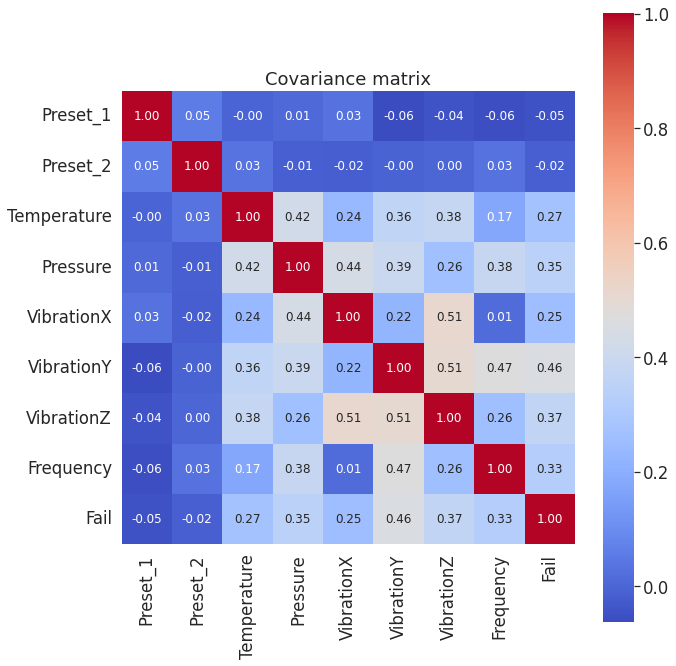

In [ ]:
cols = ['Preset_1', 'Preset_2', 'Temperature', 'Pressure', 
        'VibrationX', 'VibrationY', 'VibrationZ', 'Frequency', 'Fail'] # Predictors

covariance_matrix = np.cov(df_variable_importance.T)

plt.figure(figsize=(10,10)) # Figure scale
sns.set(font_scale=1.5) # Font scale

hm = sns.heatmap(covariance_matrix, # Setting the heatmap
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)

plt.title('Covariance matrix', size = 18) # Title

plt.tight_layout()
plt.show()

__Remarks__: 
- The covariance of each setup variable (```Preset_1```, ```Preset_2```) and ```Fail``` is at most $0.05$ in absolute value.
- The covariance of each root cause variable (```Temerature```, ```Pressure``` etc.) and ```Fail``` ranges from $0.25$ to $0.46$ in absolute value.
- We conclude that _the root cause variables are more significant than the setup variables_ in predicting equipment failure.
- The importance of root cause variables is in the following order (high to low): ```VibrationY```, ```VibrationZ```, ```Pressure```, ```Frequency```, ```Temperature```, ```VibrationX```.

#Final analysis

__Summary:__

- We had the task of predicting equipment failure based on the equipment setup configuration and on physical parameters measured by sensors.
- Our setup variables are ```Preset_1``` and ```Preset_2``` and our root cause variables are  ```Temperature```, ```Pressure```, ```VibrationX```, ```VibrationY```, ```VibrationZ``` and ```Frequency```.
- In analyzing variable imortance, ```Preset_1```, ```Preset_2``` did not seem to be important as predictors of failure.
- Indeed, the models none of models tested for setup variables were satisfactory.
- On the other hand, the root cause variables showed to be more relevant in our analysis of variable importance.
- Indeed, four out of five classical models we tested seemed promissing in predicting failure.
- When combined, these four good models formed a new one, which showed to be more accurate than each of the four individually. 
- When analyzing the statistical measures (precision and recall), we have concluded that our final model is considerably reliable when it predicts a failure.

__Final remarks:__
- For simplicity, some observations we have made during data exploration were not contemplated in our final model.
- For example, the fact that failures tend to occur in isolated sets of consecutive cycles.
- This suggests that if failure occured in previous cycles, the present cycle has a greater chance of presenting failure. This could be explored in a further, more sofisticated model.
- Another example is the fact that the configuration (Preset_1,Preset_2)=(3,4) seemed to be special in preventing failures. This hypothesis could be tested when dealing with a larger dataset. 
- The observation that ```Temperature``` and ```Frequency``` have smaller relative variation in the dataset could also be further investigated and possibly used as a criterion for feature selection.